<a href="https://colab.research.google.com/github/davismaulana/PCVK_Genap_2024/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Brightness Transformation

Formula : g(x,y) = f(x,y)+b
g(x,y) adalah nilai pixel setelah transformasi, f(x,y) adalah nilai pixel asli, adalah nilai brightness

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan: 50


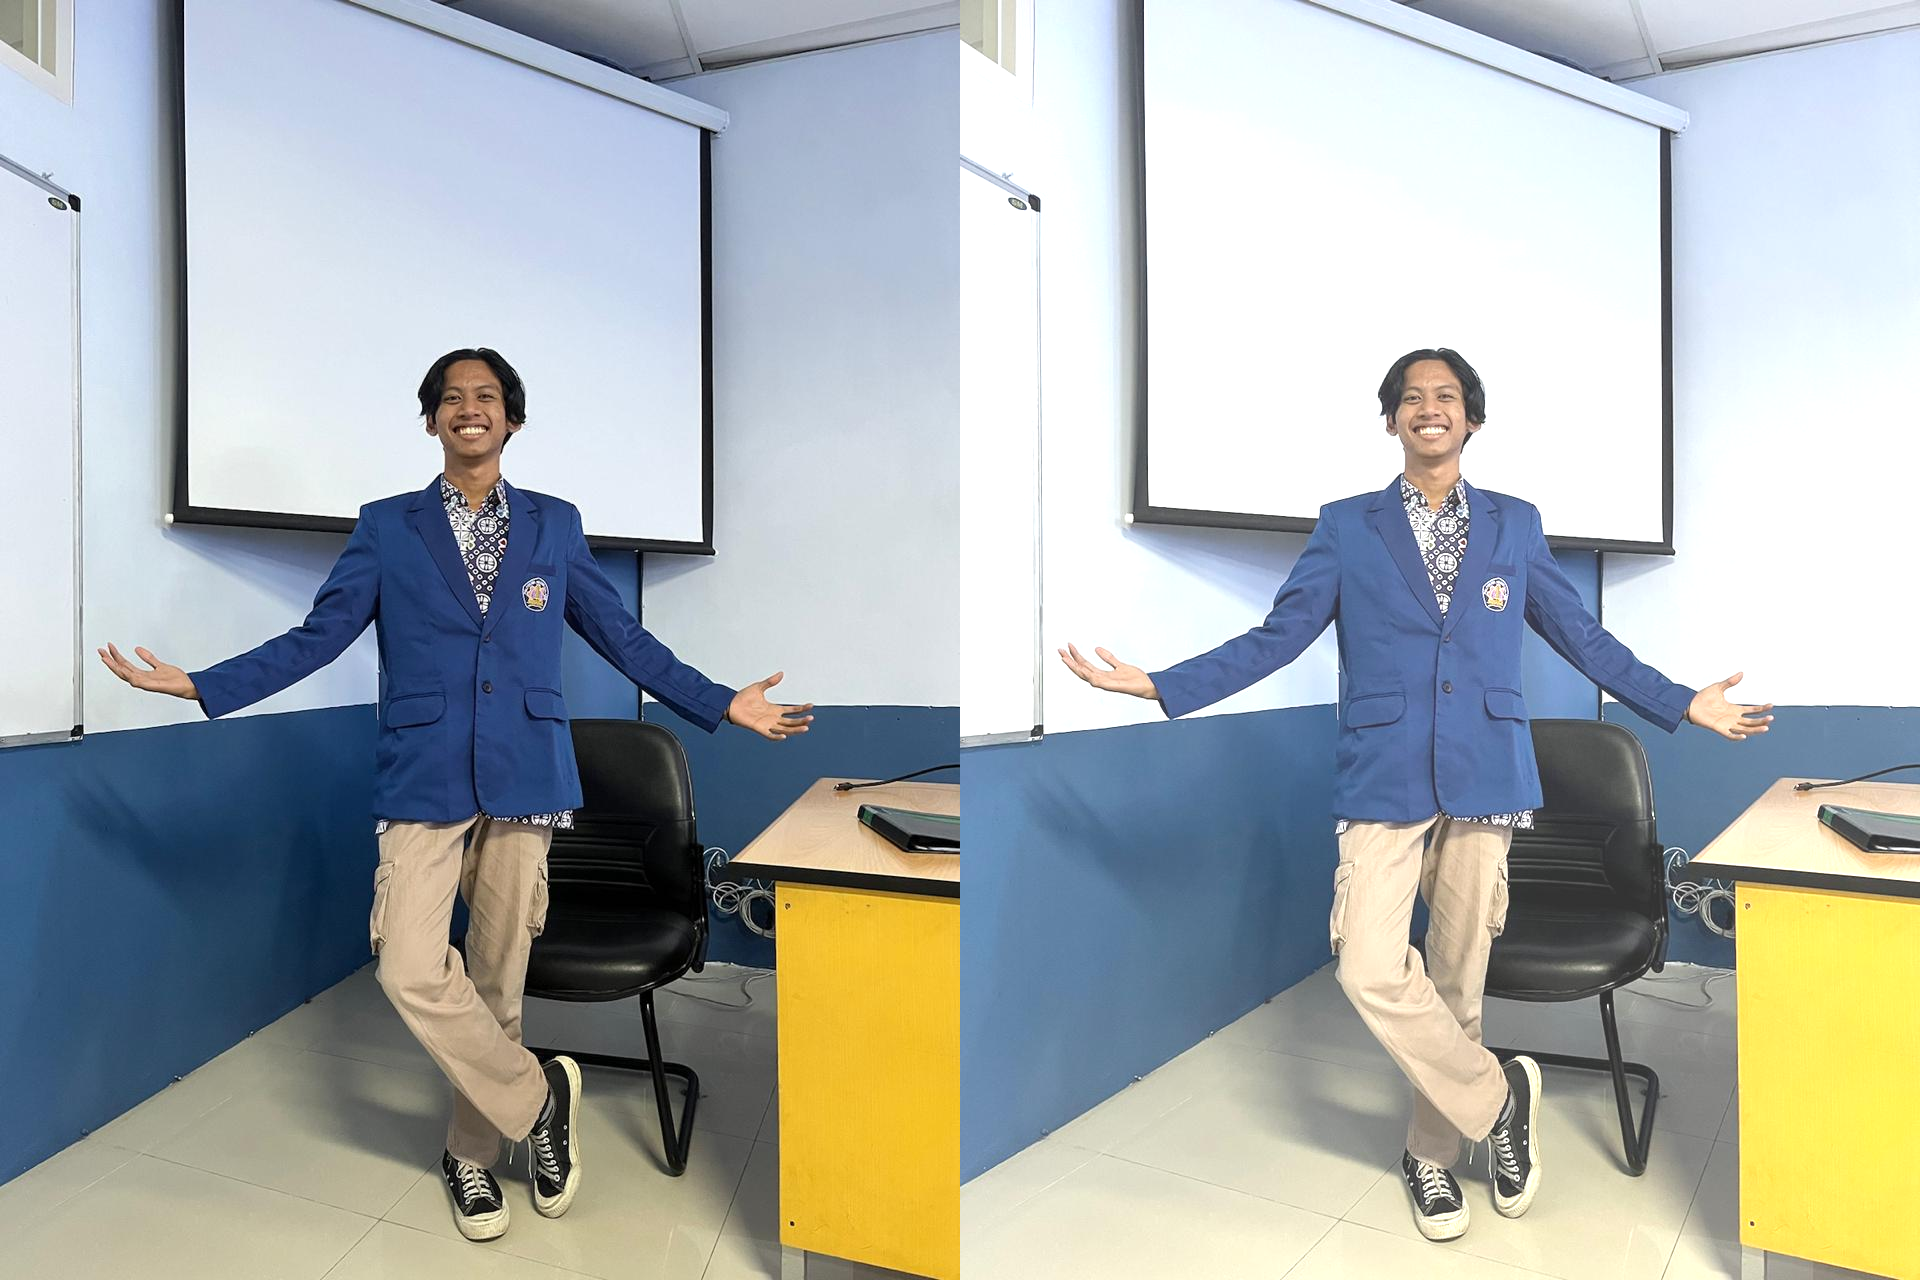

In [3]:
import cv2 as cv
from google.colab.patches import cv_imshow
import numpy as np


print('Mengubah tingkat kecerahan citra')
print('--------------------------------')

try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/images/me.jpeg')
brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness,0,255)

final_frame = cv.hconcat((original, brightness_image))
cv_imshow(final_frame)

# Practicum Assignment

1. Implement image inverse on Google Collaboratory using the formulas in the Theory Review section, resulting in the following output:

Text(0.5, 1.0, 'Citra Negative')

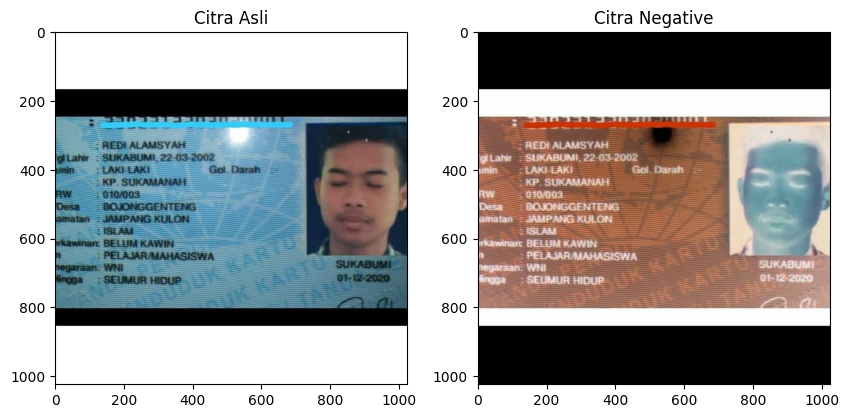

In [8]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

img = cv.imread('/content/drive/MyDrive/images/ktp.jpeg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

def inverse_citra(img):
    img = cv.imread('/content/drive/MyDrive/images/ktp.jpeg')
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    img_negatif = 255 - img
    return img_negatif

img_negatif = inverse_citra(img)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(img)
axs[0].set_title('Citra Asli')

axs[1].imshow(img_negatif)
axs[1].set_title('Citra Negative')


2. Implement the contrast transformation on Google Collaboratory using the formula found in the Theory Review section for contrast, resulting in the following output:

Masukkan tingkat kecerahan citra [-255 - 255]: 
50
Masukkan tingkat kontras citra [1.0 - 3.0]: 
2


Text(0.5, 1.0, 'Citra Contrast')

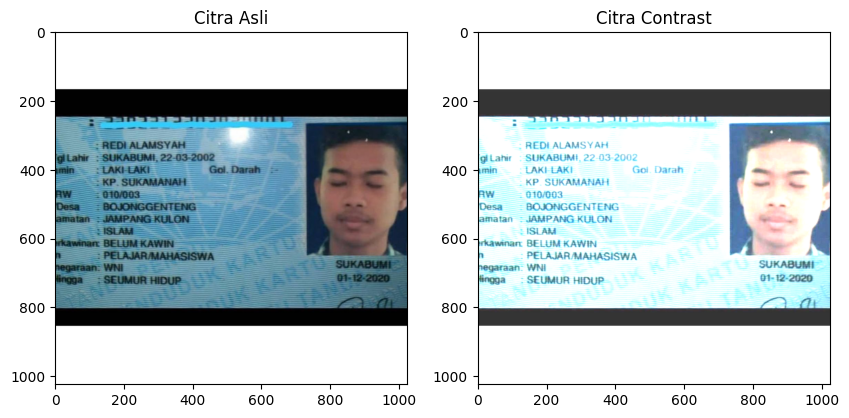

In [9]:
def transformasi_contrast(img, contrast, brightness):
    img = cv.imread('/content/drive/MyDrive/images/ktp.jpeg')
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    img_contrast = contrast * img + brightness
    img_contrast = np.clip(img_contrast, 0, 255)  # Clip values to the valid range
    return img_contrast.astype(np.uint8)  # Convert to unsigned 8-bit integer type

print("Masukkan tingkat kecerahan citra [-255 - 255]: ")
brightness = int(input())

print("Masukkan tingkat kontras citra [1.0 - 3.0]: ")
contrast = float(input())

img_contrast = transformasi_contrast(img, contrast, brightness)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(img)
axs[0].set_title('Citra Asli')

axs[1].imshow(img_contrast)
axs[1].set_title('Citra Contrast')

3. Implement the logarithmic brightness transformation on Google Collaboratory using the formulas found in the Theory Review section for log transformation, resulting in the following output:

Masukkan nilai kecerahan: 
60


Text(0.5, 1.0, 'Citra Log')

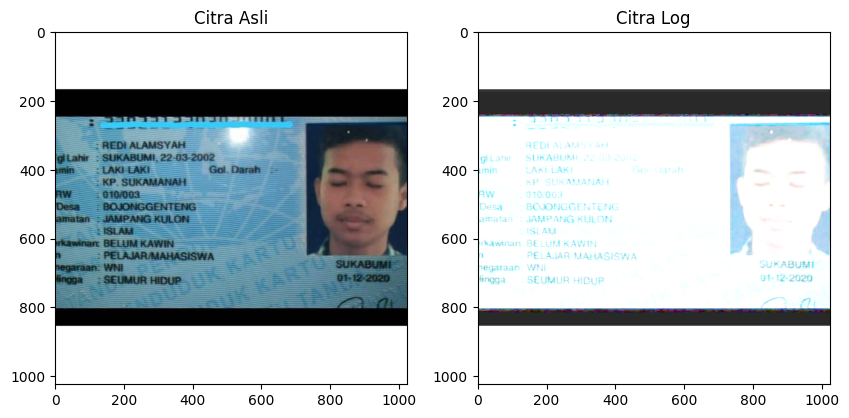

In [10]:
def transformasi_log(img, c):
    img = cv.imread('/content/drive/MyDrive/images/ktp.jpeg')
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    img_log = c * np.log1p(img)  # Use np.log1p to avoid log(0)
    img_log = np.clip(img_log, 0, 255)  # Clip values to the valid range
    return img_log.astype(np.uint8)  # Convert to unsigned 8-bit integer type

print("Masukkan nilai kecerahan: ")
c = float(input())

img_log = transformasi_log(img, c)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(img)
axs[0].set_title('Citra Asli')

axs[1].imshow(img_log)
axs[1].set_title('Citra Log')

4. Implement the grayscale transformation using the averaging, lightness, and luminance methods on Google Collaboratory using the formulas in the Theory Review section, resulting in the following output:

Text(0.5, 1.0, 'Grayscale Luminance')

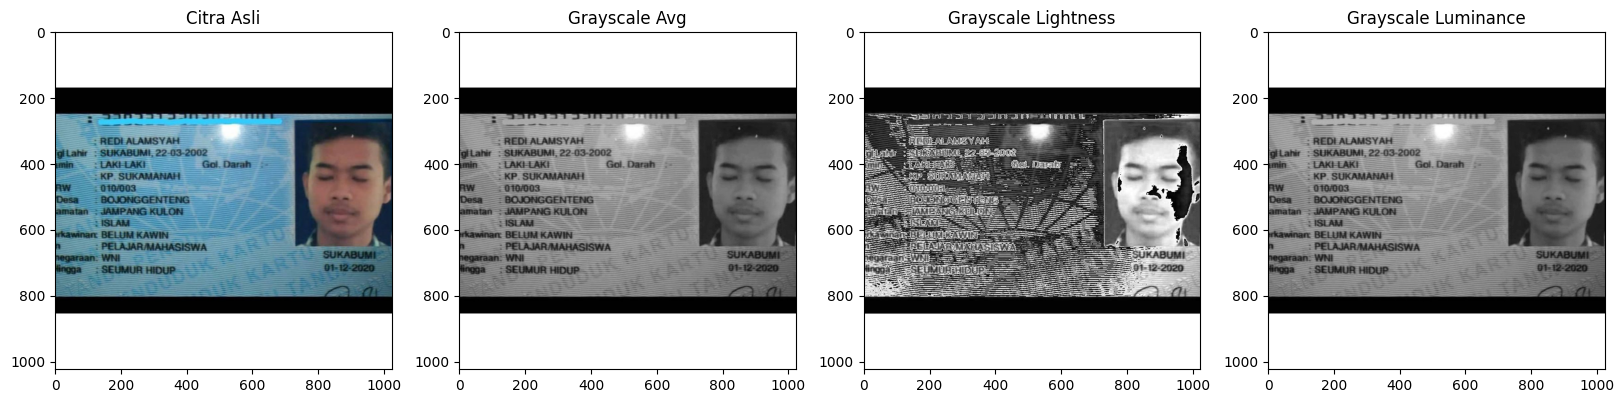

In [11]:
def grayscale(img, method):
    img = cv.imread('/content/drive/MyDrive/images/ktp.jpeg')
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    if method == 'avg':
        img_gray = np.mean(img, axis=2).astype(np.uint8)
    elif method == 'lightness':
        img_gray = (np.max(img, axis=2) + np.min(img, axis=2)) // 2
    elif method == 'luminance':
        img_gray = (0.21 * img[:, :, 0] + 0.72 * img[:, :, 1] + 0.07 * img[:, :, 2]).astype(np.uint8)
    return img_gray

img_gray_avg = grayscale(img, 'avg')
img_gray_lightness = grayscale(img, 'lightness')
img_gray_luminance = grayscale(img, 'luminance')

fig, axs = plt.subplots(1, 4, figsize=(20, 5))

axs[0].imshow(img)
axs[0].set_title('Citra Asli')

axs[1].imshow(img_gray_avg, cmap='gray')
axs[1].set_title('Grayscale Avg')

axs[2].imshow(img_gray_lightness, cmap='gray')
axs[2].set_title('Grayscale Lightness')

axs[3].imshow(img_gray_luminance, cmap='gray')
axs[3].set_title('Grayscale Luminance')

5. Show a specific color in the image, and convert the other colors to grayscale. For example, show the blue color in the input image and convert the other parts that are not blue to grayscale as in the following example:

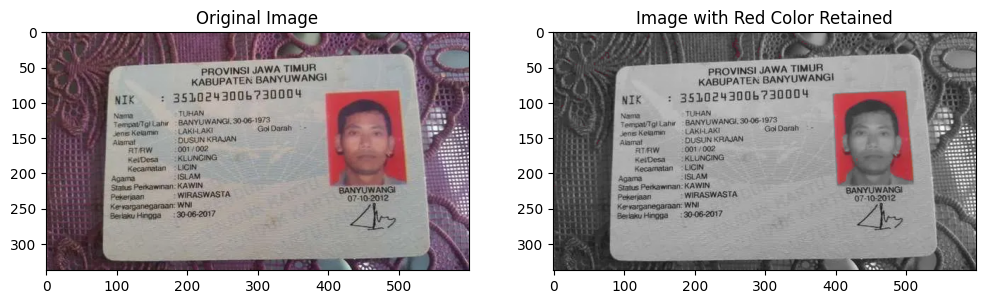

In [13]:
img = cv.imread('/content/drive/MyDrive/images/rB9L4yWb-095823_tuhan2-1.webp')

hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

lower_red1 = np.array([0, 120, 70])
upper_red1 = np.array([10, 255, 255])

lower_red2 = np.array([170, 120, 70])
upper_red2 = np.array([180, 255, 255])

mask1 = cv.inRange(hsv, lower_red1, upper_red1)
mask2 = cv.inRange(hsv, lower_red2, upper_red2)

mask = mask1 | mask2

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

gray_3_channel = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

colored_part = cv.bitwise_and(img, img, mask=mask)

mask_inverse = cv.bitwise_not(mask)
gray_part = cv.bitwise_and(gray_3_channel, gray_3_channel, mask=mask_inverse)

result = cv.add(colored_part, gray_part)

result_rgb = cv.cvtColor(result, cv.COLOR_BGR2RGB)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title('Image with Red Color Retained')
plt.imshow(result_rgb)
plt.show()